In [14]:
import os
import fitz  # PyMuPDF
import pandas as pd
from tqdm import tqdm

In [61]:
import spacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 

# Load spaCy model for named entity recognition
nlp = spacy.load("en_core_web_sm")

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
# def extract_entities(text):
#     doc = nlp(text)
#     entities = {}

#     for sent in doc.sents:
#         for token in sent:
#             if "subj" in token.dep_:
#                 subject = token.text
#             elif "obj" in token.dep_:
#                 obj = token.text
#             elif "prep" in token.dep_:
#                 relationship = token.text

#         if "subject" in locals() and "obj" in locals() and "relationship" in locals():
#             entities.update({
#                 "Subject": subject, 
#                 "Object": obj, 
#                 "Relationship": relationship
#             })
    
#     return entities

def extract_entities(sentence):
    doc = nlp(sentence)
    entities = []

    for chunk in doc.noun_chunks:
        print(chunk)
        if chunk.root.dep_ == "nsubj":
            subject = chunk.text
        elif chunk.root.dep_ == "dobj":
            obj = chunk.text

        relationship = ""
        for token in doc:
            if "subj" in token.dep_ and token.text != subject:
                relationship += token.text + " "
            elif "obj" in token.dep_ and token.text != obj:
                relationship += token.text + " "
        
        entities.append((subject.strip(), obj.strip(), relationship.strip()))
    return entities

In [42]:
# Read PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text_by_page = []

    for page_num in range(doc.page_count):
        page = doc[page_num]
        text = page.get_text()
        text_by_page.append(text)

    doc.close()
    return text_by_page

In [43]:
def process_pdf_documents(folder_path):
    data = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            text_by_page = extract_text_from_pdf(pdf_path)

            for page_num, text in enumerate(text_by_page, start=1):
                entities = extract_entities(text)

                for entity in entities:
                    # print(entity)
                    data.append(list(entity) + list([filename, page_num]))
            
    

    return pd.DataFrame(data, columns=['Subject', 'Object', 'Relationship', 'Doc Name', 'Page Number'])

In [44]:
pdf_text = extract_text_from_pdf(pdf_path='../data/raw/EdgeReport_CAMS_CaseStudy_07_11_2023_1001.pdf')

In [45]:
df = process_pdf_documents(folder_path='../data/raw/')

  0%|          | 0/1 [00:00<?, ?it/s]

COMPUTER AGE 
MANAGEMENT SERVICES 
LIMITED
Case Study
7th November


UnboundLocalError: local variable 'subject' referenced before assignment

In [26]:
entity

NameError: name 'entity' is not defined

In [46]:
sent = "Computer Age Management Services Limited (CAMS) was founded in 1988 is a technology driven financial infrastructure and services provider to mutual funds and other financial institutions for over 25 years."

In [49]:
extract_entities(sent)

Computer Age Management Services Limited


UnboundLocalError: local variable 'subject' referenced before assignment

In [50]:
doc = nlp(sent)

In [52]:
def get_subject_phrase(doc):
    for token in doc:
        if ("subj" in token.dep_):
            subtree = list(token.subtree)
            start = subtree[0].i
            end = subtree[-1].i + 1
            return doc[start:end]

In [55]:
def get_object_phrase(doc):
    for token in doc:
        if ("obj" in token.dep_):
            subtree = list(token.subtree)
            start = subtree[0].i
            end = subtree[-1].i + 1
            return doc[start:end]

In [56]:
doc = nlp(sent)
subject_phrase = get_subject_phrase(doc)
object_phrase = get_object_phrase(doc)
print(subject_phrase)
print(object_phrase)

Computer Age Management Services Limited (CAMS)
1988


In [ ]:
def extract_entities(sentence):
    doc = nlp(sentence)
    entities = []

    for chunk in doc.noun_chunks:
        print(chunk)
        if chunk.root.dep_ == "nsubj":
            subject = chunk.text
        elif chunk.root.dep_ == "dobj":
            obj = chunk.text

        relationship = ""
        for token in doc:
            if "subj" in token.dep_ and token.text != subject:
                relationship += token.text + " "
            elif "obj" in token.dep_ and token.text != obj:
                relationship += token.text + " "
        
        entities.append((subject.strip(), obj.strip(), relationship.strip()))
    return entities

In [57]:
def get_entities(sent):
 
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    
  prv_tok_text = ""   

  prefix = ""
  modifier = ""

  
  
  for tok in nlp(sent):
    
    if tok.dep_ != "punct":
     
      if tok.dep_ == "compound":
        prefix = tok.text
        
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
     
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
       
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
     
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

     
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      
      
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
 

  return [ent1.strip(), ent2.strip()]

In [66]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)


In [67]:
get_entities(sent)

['Management Services Limited', '25  years']

In [68]:
get_relation(sent)

TypeError: add() takes exactly 2 positional arguments (3 given)

In [69]:
# Your input sentence
sentence = "Bill Gates founded Microsoft in 1975."

# Process the sentence with spaCy
doc = nlp(sentence)

# Extract entities and relationships
entities = [(ent.text, ent.label_) for ent in doc.ents]
relationships = [(ent.root.head.text, ent.text, ent.root.dep_) for ent in doc.ents]

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Bill Gates', 'PERSON'), ('Microsoft', 'ORG'), ('1975', 'DATE')]
Relationships: [('founded', 'Bill Gates', 'nsubj'), ('founded', 'Microsoft', 'dobj'), ('in', '1975', 'pobj')]


In [70]:
# Process the sentence with spaCy
doc = nlp(sent)

# Extract entities and relationships
entities = [(ent.text, ent.label_) for ent in doc.ents]
relationships = [(ent.root.head.text, ent.text, ent.root.dep_) for ent in doc.ents]

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Computer Age Management Services Limited', 'ORG'), ('1988', 'DATE'), ('over 25 years', 'DATE')]
Relationships: [('founded', 'Computer Age Management Services Limited', 'nsubjpass'), ('in', '1988', 'pobj'), ('for', 'over 25 years', 'pobj')]


In [71]:
def extract_entities_and_relationships(sentence):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Extract entities and relationships for each clause
    entities = []
    relationships = []

    for sent in doc.sents:
        sent_entities = [(ent.text, ent.label_) for ent in sent.ents]
        sent_relationships = [(ent.root.head.text, ent.text, ent.root.dep_) for ent in sent.ents]

        entities.extend(sent_entities)
        relationships.extend(sent_relationships)

    return entities, relationships

In [72]:
# Your input compound sentence
compound_sentence = "Bill Gates founded Microsoft in 1975, and Steve Jobs co-founded Apple in 1976."

# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(compound_sentence)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)


Entities: [('Bill Gates', 'PERSON'), ('Microsoft', 'ORG'), ('1975', 'DATE'), ('Steve Jobs', 'PERSON'), ('Apple', 'ORG'), ('1976', 'DATE')]
Relationships: [('founded', 'Bill Gates', 'nsubj'), ('founded', 'Microsoft', 'dobj'), ('in', '1975', 'pobj'), ('co', 'Steve Jobs', 'nsubj'), ('founded', 'Apple', 'dobj'), ('in', '1976', 'pobj')]


In [73]:
# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(sent)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Computer Age Management Services Limited', 'ORG'), ('1988', 'DATE'), ('over 25 years', 'DATE')]
Relationships: [('founded', 'Computer Age Management Services Limited', 'nsubjpass'), ('in', '1988', 'pobj'), ('for', 'over 25 years', 'pobj')]


In [74]:
def extract_entities_and_relationships(sentence):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Extract entities and relationships
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relationships = []

    for token in doc:
        if token.dep_ in ("nsubj", "nsubjpass") and token.head.pos_ == "VERB":
            subject = token.text
            verb = token.head.text
            obj = [child.text for child in token.children if child.dep_ == "dobj"]

            if obj:
                relationships.append((subject, verb, obj[0]))

    return entities, relationships

# Your input sentence with both complex and compound structures
sentence = "Bill Gates, who founded Microsoft in 1975, is a philanthropist, and he donated billions of dollars."

# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(sentence)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Bill Gates', 'PERSON'), ('Microsoft', 'ORG'), ('1975', 'DATE'), ('billions of dollars', 'MONEY')]
Relationships: []


In [75]:
# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(sent)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Computer Age Management Services Limited', 'ORG'), ('1988', 'DATE'), ('over 25 years', 'DATE')]
Relationships: []


In [76]:
def extract_entities_and_relationships(sentence):
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Extract entities and relationships
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    relationships = []

    for token in doc:
        if "subj" in token.dep_ and token.head.pos_ == "VERB":
            subject = token.text
            verb = token.head.text
            obj = [child.text for child in token.head.children if "obj" in child.dep_]

            if obj:
                relationships.append((subject, verb, obj[0]))

    return entities, relationships

# Your input sentence with both complex and compound structures
sentence = "Bill Gates, who founded Microsoft in 1975, is a philanthropist, and he donated billions of dollars."

# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(sentence)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)


Entities: [('Bill Gates', 'PERSON'), ('Microsoft', 'ORG'), ('1975', 'DATE'), ('billions of dollars', 'MONEY')]
Relationships: [('who', 'founded', 'Microsoft'), ('he', 'donated', 'billions')]


In [77]:
# Extract entities and relationships
entities, relationships = extract_entities_and_relationships(sent)

# Print the results
print("Entities:", entities)
print("Relationships:", relationships)

Entities: [('Computer Age Management Services Limited', 'ORG'), ('1988', 'DATE'), ('over 25 years', 'DATE')]
Relationships: []


In [79]:
def create_knowledge_graph(document):
    # Load spaCy English model
    nlp = spacy.load("en_core_web_sm")

    # Process the document using spaCy
    doc = nlp(document)

    # Initialize a directed graph
    graph = nx.DiGraph()

    # Extract entities and relationships
    entities = set()
    relationships = []

    for token in doc:
        if token.ent_type_ and token.ent_type_ not in ("", "CARDINAL", "DATE"):  # Exclude certain types
            entities.add(token.text)

    for chunk in doc.noun_chunks:
        if len(chunk) > 1:
            relationships.append((chunk.root.text, chunk.root.head.text, chunk.text))

    # Add nodes and edges to the graph
    for entity in entities:
        graph.add_node(entity)

    for edge in relationships:
        graph.add_edge(edge[0], edge[1], relationship=edge[2])

    return graph

def visualize_knowledge_graph(graph):
    pos = nx.spring_layout(graph)  # You can choose other layout algorithms
    labels = nx.get_edge_attributes(graph, 'relationship')

    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

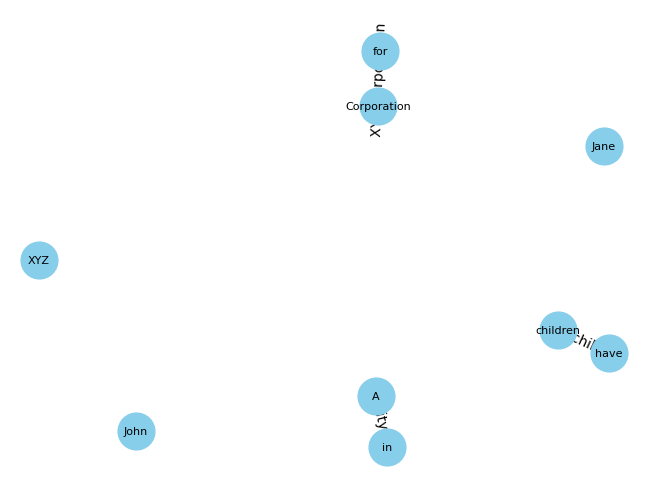

In [80]:

document = "John works for XYZ Corporation. He lives in City A and is married to Jane. They have two children, Emily and Jake."

knowledge_graph = create_knowledge_graph(document)
visualize_knowledge_graph(knowledge_graph)


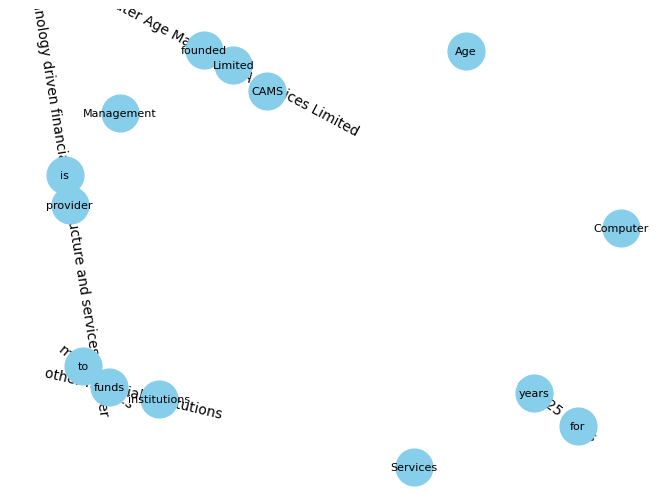

In [81]:

    knowledge_graph = create_knowledge_graph(sent)
    visualize_knowledge_graph(knowledge_graph)


In [84]:
from tika import parser
import pandas as pd
from networkx import Graph, DiGraph
from bokeh.models import ColumnDataSource, HoverTool, LabelSet, NumeralTickFormatter
from bokeh.plotting import figure, show

In [87]:
def parse_text(text):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(text)
  entities = [(e.text, e.label_, e.dep_) for e in doc.ents]
  # Process entities to identify subjects, objects and relationships
  # Modify this logic based on your specific needs
  subjects, objects, relationships = zip(*[process_entity(e) for e in entities])
  return subjects, objects, relationships

def process_entity(entity):
  # Implement your logic to extract subject, object and relationship from the entity
  # based on its text, label and dependency
  subject = entity.text
  object = ...
  relationship = ...
  return subject, object, relationship

def extract_entities(folder_path):
  """
  Extracts subjects, objects and relationships from documents/pdfs in a folder.

  Args:
    folder_path: Path to the folder containing documents/pdfs.

  Returns:
    A list of tuples (subject, object, relationship, doc_name, page_num)
  """
  entities = []
  for filename in os.listdir(folder_path):
    filepath = os.path.join(folder_path, filename)
    text = parser.from_file(filepath)['content']
    # Use any entity extraction library (e.g., spaCy) to parse text and extract entities and relationships
    # Replace the following with your chosen library's extraction logic
    for subject, object, relation in parse_text(text):
      entities.append((subject, object, relation, filename, page_num))
  return entities

def create_dataframe(entities):
  """
  Creates a Pandas DataFrame from extracted entities.

  Args:
    entities: List of tuples (subject, object, relationship, doc_name, page_num)

  Returns:
    A Pandas DataFrame with columns: Subject, Object, Relationship, Doc Name, Page Number
  """
  df = pd.DataFrame(entities, columns=['Subject', 'Object', 'Relationship', 'Doc Name', 'Page Number'])
  return df

def create_graph(df):
  """
  Creates a Bokeh interactive directed graph from the DataFrame.

  Args:
    df: Pandas DataFrame with extracted entities.

  Returns:
    A Bokeh figure representing the interactive directed graph.
  """
  graph = DiGraph()
  for i, row in df.iterrows():
    graph.add_edge(row['Subject'], row['Object'], label=row['Relationship'])

  source = ColumnDataSource(graph.nodes, graph.edges)

  p = figure(x_range=list(graph.nodes), y_range=list(graph.nodes), title="Extracted Entities Graph")

  # Nodes
  p.circle(x='index', y='index', size=10, source=source, color='skyblue')
  p.add_layout(LabelSet(x='index', y='index', text='index', source=source, level='glyph'))

  # Edges
  p.segment(x0='start', y0='start', x1='end', y1='end', source=source, line_width=2, color='gray',
           legend_label="Relationships")

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
    ('Subject:', '@index'),
    ('Object:', '@index'),
    ('Relationship:', '@label'),
    ('Document:', '@{"Doc Name": "doc_name"}'),
    ('Page:', '@{"Page Number": "page_num"}'),
  ]
  p.add_tools(hover)

  p.xaxis.formatter = NumeralTickFormatter(format="0")
  p.yaxis.formatter = NumeralTickFormatter(format="0")

  # Zoom and filter options (uncomment if needed)
  # p.zoom_in_tool = PanTool()
  # p.zoom_out_tool = WheelZoomTool()

  return p

def main():
  folder_path = '../data/raw/'
  entities = extract_entities(folder_path)
  df = create_dataframe(entities)
  graph = create_graph(df)
  show(graph)

if __name__ == "__main__":
  main()


AttributeError: 'spacy.tokens.span.Span' object has no attribute 'dep_'